Importamos los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Leemos el dataset original

In [3]:
df = pd.read_csv('../dataset.csv')  # o pd.read_excel(...)
print(f"Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")

Dataset cargado: 21742 filas × 58 columnas


Nos quedamos con las columnas que queremos preprocesar

In [25]:
columns = ['sq_mt_built', 'sq_mt_useful', 'n_rooms', 'has_lift']
df = df[columns]

Vemos la información de cuantos valores nulos tienen

In [26]:
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


sq_mt_useful    62.156195
has_lift        10.974151
sq_mt_built      0.579524
n_rooms          0.000000
dtype: float64

Observamos que menos n_rooms, las otras columnas tienen valores nulos. Es necesario preprocesarlas para imputarlos

Imputamos los valores nulos de sq_mt_build. Observamos que hay algunos outliers, así que será mejor utilizar la mediana.

Mitjana: 146.9208919319023
Mediana: 100.0


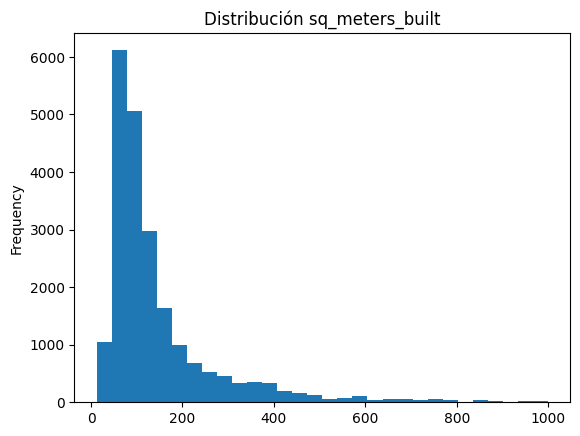

In [27]:
print("Mitjana:", df['sq_mt_built'].mean())
print("Mediana:", df['sq_mt_built'].median())
df['sq_mt_built'].plot(kind='hist', bins=30, title='Distribución sq_meters_built')

df['sq_mt_built'] = df['sq_mt_built'].fillna(df['sq_mt_built'].median())

Imputamos los valores nulos de sq_mt_useful. Vemos que hay algunos outliers así que decidimos hacerlo con la mediana.

Mitjana: 103.45819154107924
Mediana: 79.0


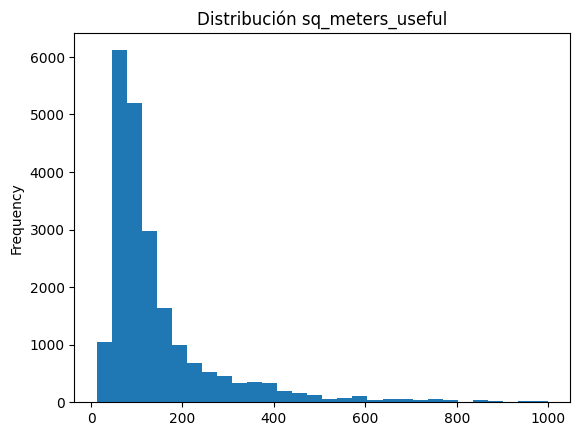

In [28]:
print("Mitjana:", df['sq_mt_useful'].mean())
print("Mediana:", df['sq_mt_useful'].median())
df['sq_mt_built'].plot(kind='hist', bins=30, title='Distribución sq_meters_useful')

df['sq_mt_useful'] = df['sq_mt_useful'].fillna(df['sq_mt_useful'].median())

Imputamos los valores nulos de has_lift. Como puede ser que los casos en que se desconoce si hay ascensor o no estén relacionados con pisos más antiguos y baratos, creamos una nueva categoría unknown representada por el número 2.

In [29]:
df['has_lift'] = df['has_lift'].fillna(2)

Comprovamos que se hayan eliminado todos los valores nulos

In [30]:
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


sq_mt_built     0.0
sq_mt_useful    0.0
n_rooms         0.0
has_lift        0.0
dtype: float64